***MNIST Normal Implementation - Categorical crossentropy Loss, Adam Optimizer, Accuracy Metrics***

In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

(X_train_mnist, Y_train_mnist), (X_test_mnist, Y_test_mnist) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


5


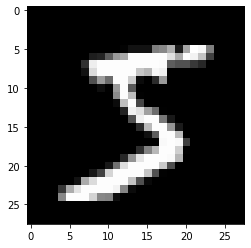

In [2]:
print(Y_train_mnist[0])
plt.imshow(X_train_mnist[0], cmap='gray')

3


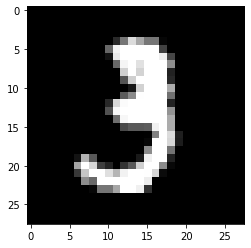

In [3]:
print(Y_train_mnist[10])
plt.imshow(X_train_mnist[10], cmap='gray')

2


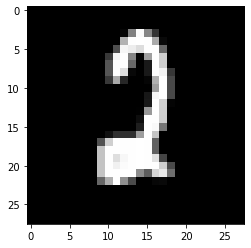

In [4]:
print(Y_train_mnist[10100])
plt.imshow(X_train_mnist[10100], cmap='gray')

In [5]:
from tensorflow.keras.utils import to_categorical

Y_train_mnist_req = to_categorical(Y_train_mnist)
Y_test_mnist_req = to_categorical(Y_test_mnist)

print(X_train_mnist.shape, X_test_mnist.shape, Y_train_mnist_req.shape, Y_test_mnist_req.shape)

(60000, 28, 28) (10000, 28, 28) (60000, 10) (10000, 10)


In [6]:
X_train_mnist = X_train_mnist.reshape((X_train_mnist.shape[0], 28, 28, 1))
X_test_mnist = X_test_mnist.reshape((X_test_mnist.shape[0], 28, 28, 1))

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

augmentor_mnist = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=False, vertical_flip=False, validation_split=0.1)

train_batch_mnist = augmentor_mnist.flow(X_train_mnist, Y_train_mnist_req, shuffle=True, subset='training')
val_batch_mnist = augmentor_mnist.flow(X_train_mnist, Y_train_mnist_req, subset='validation')

In [8]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Input, ZeroPadding2D, BatchNormalization, Dropout, ReLU
from tensorflow.keras.models import Sequential

In [9]:
model = Sequential()
model.add(Input((28, 28, 1)))
model.add(ZeroPadding2D((2,2)))

model.add(Conv2D(32, (3,3), padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(32, (3,3), padding='same', kernel_initializer='glorot_normal', activation=ReLU(max_value=1000, threshold=0)))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(32, (5,5), strides=2, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(BatchNormalization(axis=3))

model.add(Conv2D(64, (3,3), padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(64, (3,3), padding='same', kernel_initializer='glorot_normal', activation=ReLU(max_value=1000, threshold=0)))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(64, (5,5), strides=2, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(BatchNormalization(axis=3))

model.add(Conv2D(128, (4,4), padding='same', kernel_initializer='glorot_normal', activation=ReLU(max_value=1000, threshold=0)))
model.add(BatchNormalization(axis=3))

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        25632     
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 32)        1

In [11]:
from tensorflow.keras.optimizers import SGD

opt = SGD(lr=0.001, momentum=0.9)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [12]:
history_mnist = model.fit_generator(train_batch_mnist, validation_data=val_batch_mnist, steps_per_epoch=(54000/32), epochs=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
1688/1687 [==============================] - 22s 13ms/step - loss: 0.2730 - accuracy: 0.9208 - val_loss: 0.1015 - val_accuracy: 0.9735
Epoch 2/50
1688/1687 [==============================] - 22s 13ms/step - loss: 0.0988 - accuracy: 0.9719 - val_loss: 0.0554 - val_accuracy: 0.9853
Epoch 3/50
1688/1687 [==============================] - 21s 13ms/step - loss: 0.0827 - accuracy: 0.9772 - val_loss: 0.0621 - val_accuracy: 0.9813
Epoch 4/50
1688/1687 [==============================] - 21s 13ms/step - loss: 0.0671 - accuracy: 0.9810 - val_loss: 0.0572 - val_accuracy: 0.9825
Epoch 5/50
1688/1687 [==============================] - 21s 12ms/step - loss: 0.0633 - accuracy: 0.9822 - val_loss: 0.0612 - val_accuracy: 0.9853
Epoch 6/50
1688/1687 [==============================] - 21s 12ms/step - loss: 0.0564 - accuracy: 0.9849 - val_loss: 0.0420 - val_accuracy: 0.9888
Epoch 7/50
1688/1687 [==========================

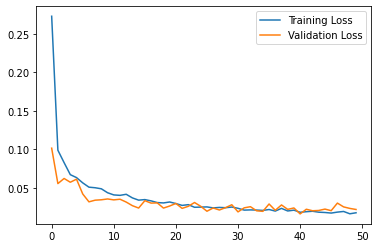

In [13]:
plt.plot(history_mnist.history['loss'])
plt.plot(history_mnist.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'], loc='best')
plt.show()

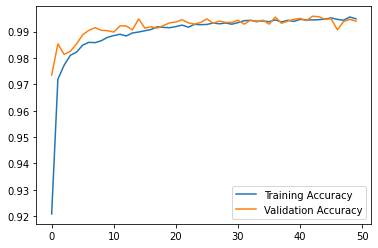

In [14]:
plt.plot(history_mnist.history['accuracy'])
plt.plot(history_mnist.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='best')
plt.show()

In [15]:
model.evaluate(X_test_mnist, Y_test_mnist_req)

313/313 [==============================] - 1s 4ms/step - loss: 0.0170 - accuracy: 0.9961


[0.01698206551373005, 0.9961000084877014]

***Fashion MNIST Normal Implementation - Categorical Crossentropy, Adam Loss, Accuracy Metrics***

In [16]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

(X_train_fmnist, Y_train_fmnist), (X_test_fmnist, Y_test_fmnist) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


9


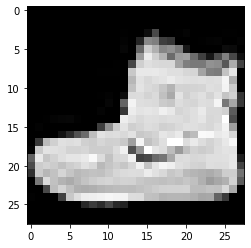

In [17]:
print(Y_train_fmnist[0])
plt.imshow(X_train_fmnist[0], cmap='gray')

0


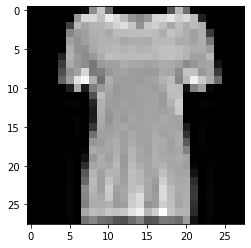

In [18]:
print(Y_train_fmnist[10])
plt.imshow(X_train_fmnist[10], cmap='gray')

1


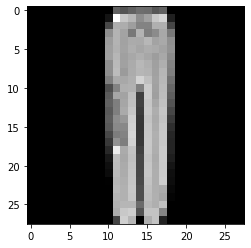

In [19]:
print(Y_train_fmnist[1000])
plt.imshow(X_train_fmnist[1000], cmap='gray')

In [20]:
from tensorflow.keras.utils import to_categorical

Y_train_req_fmnist = to_categorical(Y_train_fmnist)
Y_test_req_fmnist = to_categorical(Y_test_fmnist)

In [21]:
X_train_fmnist = X_train_fmnist.reshape((X_train_fmnist.shape[0], 28, 28, 1))
X_test_fmnist = X_test_fmnist.reshape((X_test_fmnist.shape[0], 28, 28, 1))

print(X_train_fmnist.shape, X_test_fmnist.shape, Y_train_req_fmnist.shape, Y_test_req_fmnist.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000, 10) (10000, 10)


In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

augmentor_fmnist = ImageDataGenerator(rotation_range=10, height_shift_range=0.1, width_shift_range=0.1, horizontal_flip=True, validation_split=0.1)

train_batch_fmnist = augmentor_fmnist.flow(X_train_fmnist, Y_train_req_fmnist, shuffle=True, subset='training')
val_batch_fmnist = augmentor_fmnist.flow(X_train_fmnist, Y_train_req_fmnist, subset='validation')

In [23]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, BatchNormalization, Input, ZeroPadding2D, ReLU
from tensorflow.keras.models import Sequential

In [24]:
model_fmnist = Sequential()
model_fmnist.add(Input((28, 28, 1)))
model_fmnist.add(ZeroPadding2D((2,2)))

model_fmnist.add(Conv2D(32, (3,3), padding='same', kernel_initializer='glorot_normal', activation='relu'))
model_fmnist.add(BatchNormalization(axis=3))
model_fmnist.add(Conv2D(32, (3,3), padding='same', kernel_initializer='glorot_normal', activation=ReLU(max_value=1000, threshold=0)))
model_fmnist.add(BatchNormalization(axis=3))
model_fmnist.add(Conv2D(32, (5,5), strides=2, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model_fmnist.add(BatchNormalization(axis=3))

model_fmnist.add(Conv2D(64, (3,3), padding='same', kernel_initializer='glorot_normal', activation='relu'))
model_fmnist.add(BatchNormalization(axis=3))
model_fmnist.add(Conv2D(64, (3,3), padding='same', kernel_initializer='glorot_normal', activation=ReLU(max_value=1000, threshold=0)))
model_fmnist.add(BatchNormalization(axis=3))
model_fmnist.add(Conv2D(64, (5,5), strides=2, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model_fmnist.add(BatchNormalization(axis=3))

model_fmnist.add(Conv2D(128, (4,4), padding='same', kernel_initializer='glorot_normal', activation=ReLU(max_value=1000, threshold=0)))
model_fmnist.add(BatchNormalization(axis=3))

model_fmnist.add(Flatten())
model_fmnist.add(BatchNormalization())
model_fmnist.add(Dropout(0.4))
model_fmnist.add(Dense(10, activation='softmax'))

In [25]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.001, momentum=0.9)

model_fmnist.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [26]:
history_fmnist = model_fmnist.fit_generator(train_batch_fmnist, validation_data=val_batch_fmnist, epochs=150, steps_per_epoch=(54000//32))

Epoch 1/150
1687/1687 [==============================] - 20s 12ms/step - loss: 0.9082 - accuracy: 0.7285 - val_loss: 0.6017 - val_accuracy: 0.8045
Epoch 2/150
1687/1687 [==============================] - 20s 12ms/step - loss: 0.6668 - accuracy: 0.7914 - val_loss: 0.5675 - val_accuracy: 0.8125
Epoch 3/150
1687/1687 [==============================] - 20s 12ms/step - loss: 0.5723 - accuracy: 0.8165 - val_loss: 0.5203 - val_accuracy: 0.8248
Epoch 4/150
1687/1687 [==============================] - 20s 12ms/step - loss: 0.5289 - accuracy: 0.8288 - val_loss: 0.4456 - val_accuracy: 0.8477
Epoch 5/150
1687/1687 [==============================] - 20s 12ms/step - loss: 0.4655 - accuracy: 0.8448 - val_loss: 0.3851 - val_accuracy: 0.8710
Epoch 6/150
1687/1687 [==============================] - 20s 12ms/step - loss: 0.4352 - accuracy: 0.8514 - val_loss: 0.3558 - val_accuracy: 0.8745
Epoch 7/150
1687/1687 [==============================] - 20s 12ms/step - loss: 0.4105 - accuracy: 0.8606 - val_loss: 0

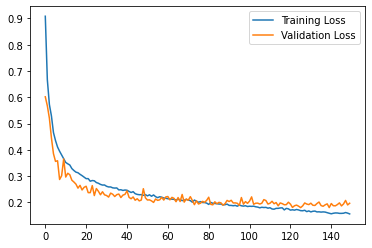

In [27]:
plt.plot(history_fmnist.history['loss'])
plt.plot(history_fmnist.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'], loc='best')
plt.show()

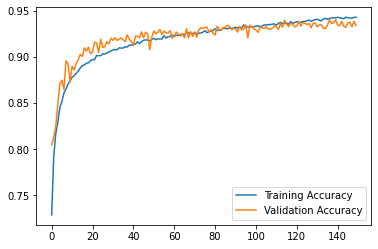

In [28]:
plt.plot(history_fmnist.history['accuracy'])
plt.plot(history_fmnist.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='best')
plt.show()

In [29]:
model_fmnist.evaluate(X_test_fmnist, Y_test_req_fmnist)

313/313 [==============================] - 1s 4ms/step - loss: 0.2195 - accuracy: 0.9241


[0.21953405439853668, 0.9240999817848206]

***CIFAR100 Normal implementation - Categorical Crossentropy Loss, Adam Optimizer and Accuracy Metrics***

In [30]:
from tensorflow.keras.datasets import cifar100
import matplotlib.pyplot as plt

(X_train_cifar100, Y_train_cifar100), (X_test_cifar100, Y_test_cifar100) = cifar100.load_data()

169009152/169001437 [==============================] - 13s 0us/step


[19]


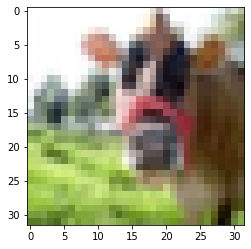

In [31]:
print(Y_train_cifar100[0])
plt.imshow(X_train_cifar100[0])

[39]


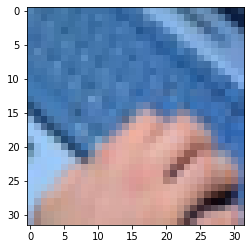

In [32]:
print(Y_train_cifar100[10])
plt.imshow(X_train_cifar100[10])

[55]


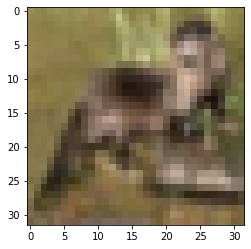

In [33]:
print(Y_train_cifar100[100])
plt.imshow(X_train_cifar100[100])

In [34]:
from tensorflow.keras.utils import to_categorical

Y_train_req_cifar100 = to_categorical(Y_train_cifar100)
Y_test_req_cifar100 = to_categorical(Y_test_cifar100)

print(X_train_cifar100.shape, X_test_cifar100.shape, Y_train_req_cifar100.shape, Y_test_req_cifar100.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 100) (10000, 100)


In [45]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Dropout, MaxPool2D, Input, Dense, GlobalAveragePooling2D, Add, Activation, ZeroPadding2D
from tensorflow.keras.models import Sequential

In [46]:
model_cifar100 = Sequential()
model_cifar100.add(Input((32, 32, 3)))

model_cifar100.add(Conv2D(64, (3,3), padding='same', kernel_initializer='glorot_normal', activation='relu'))
model_cifar100.add(BatchNormalization(axis=3))
model_cifar100.add(Conv2D(64, (3,3), padding='same', kernel_initializer='glorot_normal', activation=ReLU(max_value=1000, threshold=0)))
model_cifar100.add(BatchNormalization(axis=3))
model_cifar100.add(Conv2D(64, (5,5), strides=2, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model_cifar100.add(BatchNormalization(axis=3))

model_cifar100.add(Conv2D(128, (3,3), padding='same', kernel_initializer='glorot_normal', activation='relu'))
model_cifar100.add(BatchNormalization(axis=3))
model_cifar100.add(Conv2D(128, (3,3), padding='same', kernel_initializer='glorot_normal', activation=ReLU(max_value=1000, threshold=0)))
model_cifar100.add(BatchNormalization(axis=3))
model_cifar100.add(Conv2D(128, (5,5), strides=2, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model_cifar100.add(BatchNormalization(axis=3))

model_cifar100.add(Conv2D(256, (4,4), padding='same', kernel_initializer='glorot_normal', activation=ReLU(max_value=1000, threshold=0)))
model_cifar100.add(BatchNormalization(axis=3))

model_cifar100.add(Flatten())
model_cifar100.add(BatchNormalization())
model_cifar100.add(Dropout(0.4))
model_cifar100.add(Dense(100, activation='softmax'))

In [47]:
model_cifar100.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_24 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_25 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 16, 16, 64)        102464    
_________________________________________________________________
batch_normalization_26 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 16, 16, 128)      

In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

augmentor_cifar100 = ImageDataGenerator(rotation_range=10, height_shift_range=0.1, width_shift_range=0.1, horizontal_flip=True, validation_split=0.1)

train_batch_cifar100 = augmentor_cifar100.flow(X_train_cifar100, Y_train_req_cifar100, shuffle=True, subset='training')
val_batch_cifar100 = augmentor_cifar100.flow(X_train_cifar100, Y_train_req_cifar100, subset='validation')

In [49]:
from tensorflow.keras.optimizers import SGD

opt = SGD(lr=0.001, momentum=0.9)

model_cifar100.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [50]:
history_cifar100 = model_cifar100.fit_generator(train_batch_cifar100, validation_data=val_batch_cifar100, steps_per_epoch=(45000/32), epochs=200)

Epoch 1/200
1407/1406 [==============================] - 30s 21ms/step - loss: 5.5816 - accuracy: 0.0907 - val_loss: 5.7018 - val_accuracy: 0.1306
Epoch 2/200
1407/1406 [==============================] - 30s 21ms/step - loss: 5.1007 - accuracy: 0.1552 - val_loss: 7.4249 - val_accuracy: 0.1626
Epoch 3/200
1407/1406 [==============================] - 29s 21ms/step - loss: 4.4832 - accuracy: 0.1920 - val_loss: 3.6405 - val_accuracy: 0.2138
Epoch 4/200
1407/1406 [==============================] - 30s 21ms/step - loss: 3.5466 - accuracy: 0.2357 - val_loss: 3.1897 - val_accuracy: 0.2726
Epoch 5/200
1407/1406 [==============================] - 30s 21ms/step - loss: 3.1529 - accuracy: 0.2796 - val_loss: 3.2168 - val_accuracy: 0.2916
Epoch 6/200
1407/1406 [==============================] - 29s 21ms/step - loss: 2.9076 - accuracy: 0.3145 - val_loss: 2.9323 - val_accuracy: 0.3128
Epoch 7/200
1407/1406 [==============================] - 30s 21ms/step - loss: 2.7670 - accuracy: 0.3384 - val_loss: 2

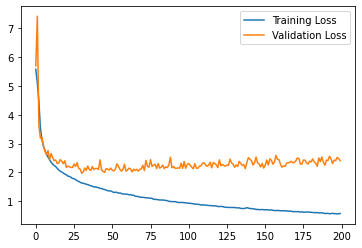

In [51]:
plt.plot(history_cifar100.history['loss'])
plt.plot(history_cifar100.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'], loc='best')
plt.show()

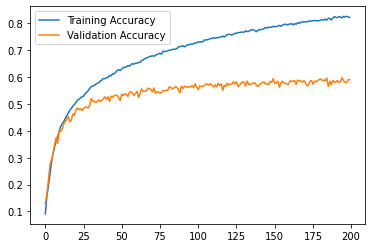

In [52]:
plt.plot(history_cifar100.history['accuracy'])
plt.plot(history_cifar100.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='best')
plt.show()

In [53]:
model_cifar100.evaluate(X_test_cifar100, Y_test_req_cifar100)

313/313 [==============================] - 2s 6ms/step - loss: 2.6947 - accuracy: 0.5972


[2.6947216987609863, 0.5971999764442444]